In [1]:
import torch
from source.ProcessData import ProcessData
from source.Model import Net
from torch import optim
from source.Utils import RandomSplit, Train, Validation,Predict, plot_loss, plot_predition
from torch_scatter import scatter_mean
from torch.optim.lr_scheduler import StepLR

/Users/dinupa/mambaforge/envs/vertexML/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get the processed data

dataset = ProcessData('data/')
data = dataset[0]

In [3]:
# split the data to train, validate, test = 60:20:20
data = RandomSplit(data, 0.2, 0.2, 64)

In [4]:
# loa the model
model = Net()

model

Net(
  (dnn1): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=8, bias=True)
  )
  (conv): ModuleList(
    (0): GravNetConv_vtx(8, 8, k=3)
  )
  (dnn2): Sequential(
    (0): Linear(in_features=12, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [5]:
total_trainable_params = sum(p.numel() for p in model.parameters())
print('total trainable params:', total_trainable_params)

total trainable params: 925


In [6]:
optimizer = optim.Adam(model.parameters(), lr=1.0e-05)
scheduler = StepLR(optimizer, step_size=5, gamma=1.0e-06)

In [7]:
loss, epochs = {'train': [], 'valid': []}, []

# train the model and validate
for epoch in range(1, 21):
    epochs.append(epoch)
    loss['train'].append(Train(model, data['train'], optimizer, epoch))
    loss['valid'].append(Validation(model, data['valid'], epoch))
    scheduler.step()

In [8]:
torch.save(model.state_dict(), 'model.pt')

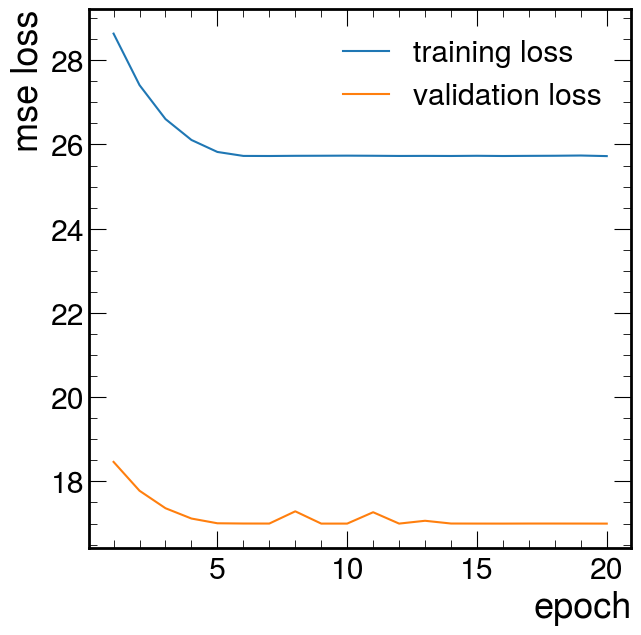

In [9]:
# plot the loss for train and validation
plot_loss(epochs, loss)

In [10]:
# make predictions
predct_data = Predict(model, data['test'])

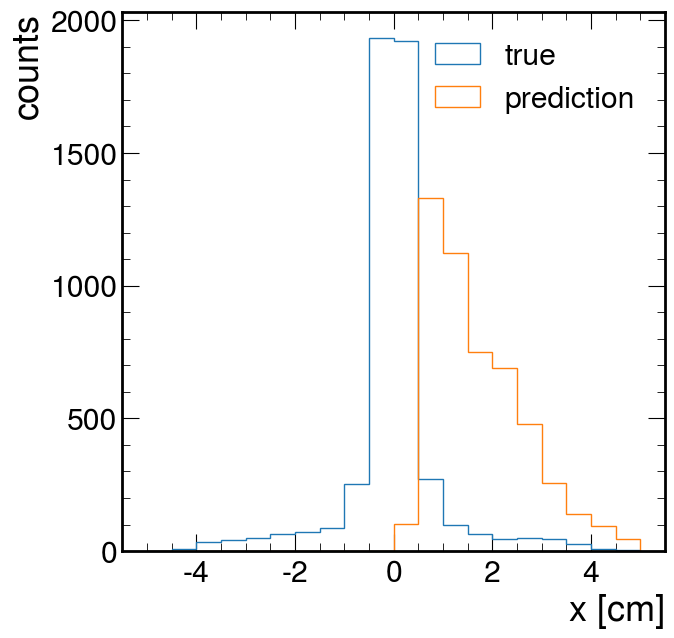

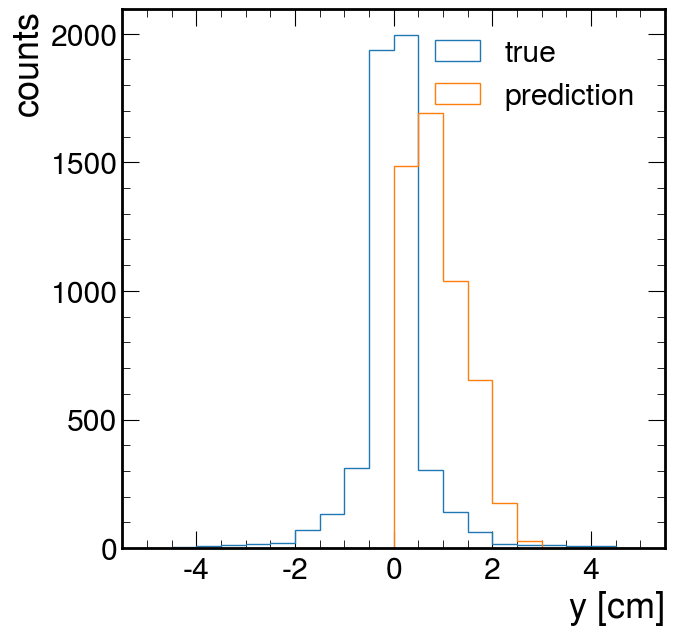

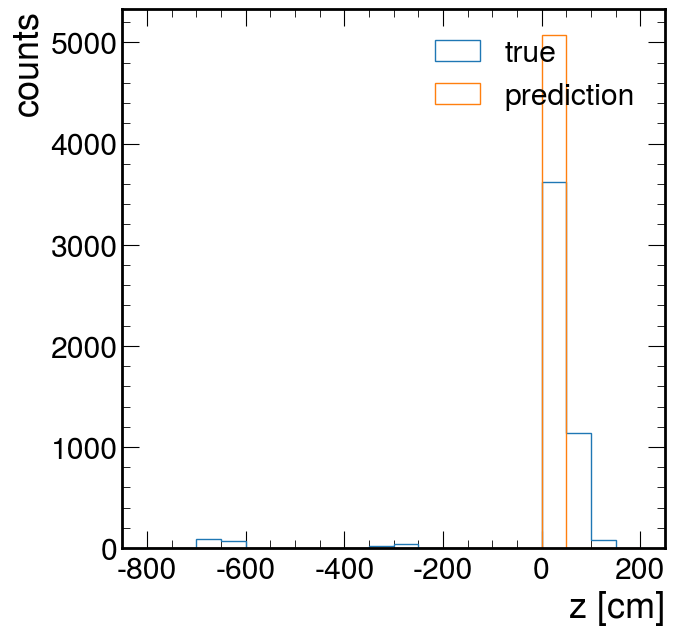

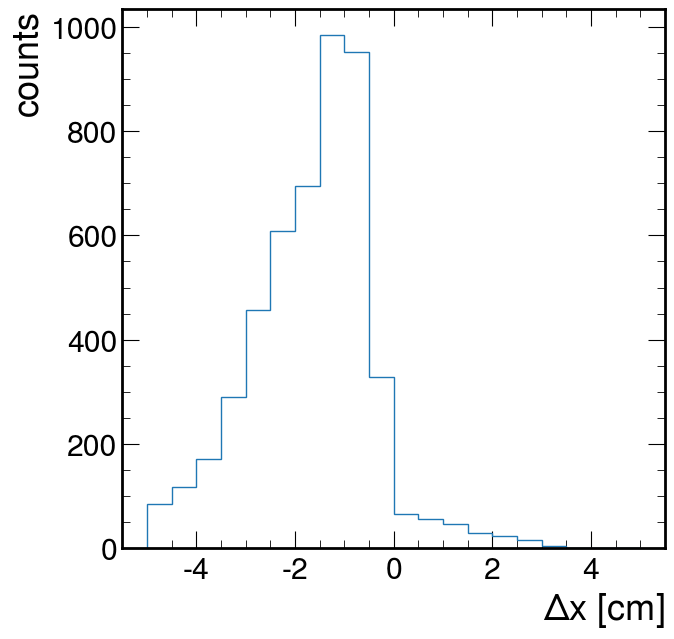

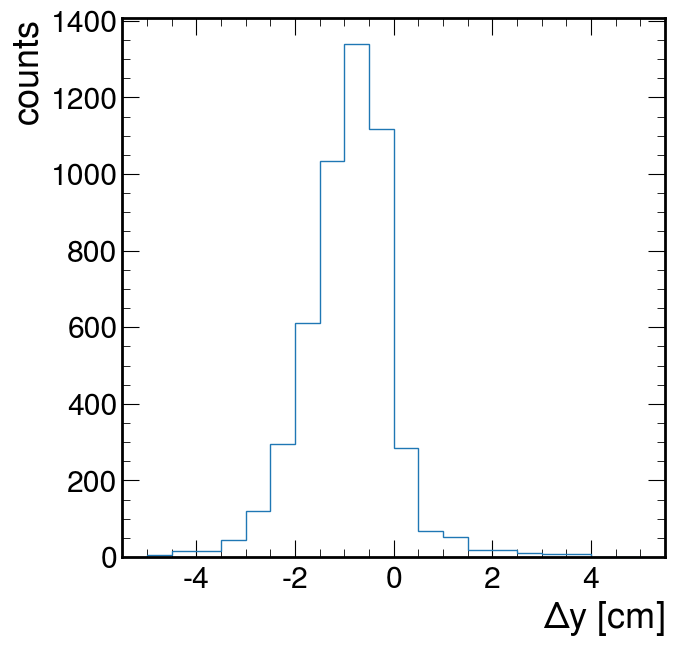

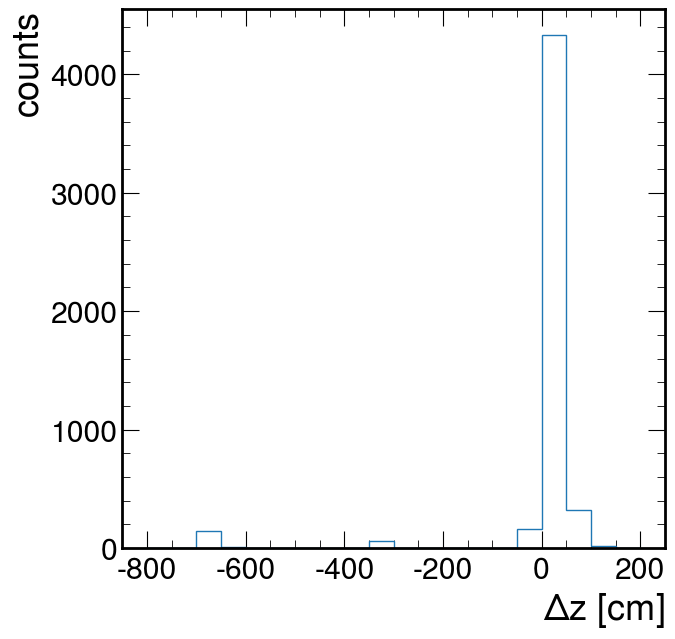

In [11]:
# plot predictions
plot_predition(predct_data)